In [1]:
# Importando bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def transform_to_RGB(img_array):
    return img_array.reshape(len(img_array), 3,32,32).transpose([0, 2, 3, 1])

def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [51]:
# Definindo número de épocas
epochs = 15
batch_size = 128

# Definindo tamanho das imagens
channels, img_rows, img_cols = 3, 32, 32
img_shape = (channels, img_rows, img_cols)
input_shape = img_shape
### CIFAR-10 dataset ###

learning_rate = 0.001
# Definindo informações das classes
num_classes = 10
label_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Carregando imagens
batch = unpickle('cifar-10-batches-py/data_batch_1')
data = transform_to_RGB(batch[b'data'])
labels = np.array(batch[b'labels'])


In [38]:
indices = np.random.permutation(labels.shape[0])
split = int(labels.shape[0]*0.8)
train_idx, test_idx = indices[:split], indices[split:]
train_images, test_images = data[train_idx, :], data[test_idx, :]
train_labels, test_labels = labels[train_idx], labels[test_idx]
# Convertendo os labels de entrada e saída para dummy values
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
train_images = normalize(train_images)
test_images = normalize(test_images)

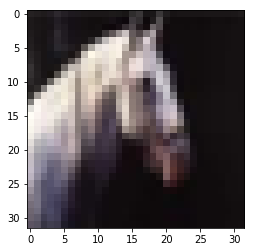

In [31]:
plt.imshow(train_images[1])

In [32]:
label_names[train_labels[1]]

'horse'

In [52]:
print('Convolutional Neural Network')

model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Convolutional Neural Network
Epoch 1/15
8000/8000 [==============================] - 8s 970us/step - loss: 2.1021 - acc: 0.1846
Epoch 2/15
8000/8000 [==============================] - 5s 626us/step - loss: 1.7318 - acc: 0.3349
Epoch 3/15
8000/8000 [==============================] - 5s 627us/step - loss: 1.4506 - acc: 0.4528
Epoch 4/15
8000/8000 [==============================] - 5s 625us/step - loss: 1.2856 - acc: 0.5245
Epoch 5/15
8000/8000 [==============================] - 5s 626us/step - loss: 1.0968 - acc: 0.5981
Epoch 6/15
8000/8000 [==============================] - 5s 624us/step - loss: 0.9568 - acc: 0.6569
Epoch 7/15
8000/8000 [==============================] - 5s 625us/step - loss: 0.7734 - acc: 0.7214
Epoch 8/15
8000/8000 [==============================] - 5s 624us/step - loss: 0.5784 - acc: 0.7985
Epoch 9/15
8000/8000 [==============================] - 5s 624us/step - loss: 0.5297 - acc: 0.8118
Epoch 10/15
8000/8000 [==============================] - 5s 624us/step - loss: 0